In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import tree
import matplotlib.pyplot as plt

In [2]:
col_names=['pregnant','glucose','bp','skin','insulin','bmi','pedigree','age','label']
df=pd.read_csv('diabetes.csv',header=None,names=col_names)
df.head()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
1,6,148,72,35,0,33.6,0.627,50,1
2,1,85,66,29,0,26.6,0.351,31,0
3,8,183,64,0,0,23.3,0.672,32,1
4,1,89,66,23,94,28.1,0.167,21,0


In [3]:
df.describe()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
count,769,769,769,769,769,769,769,769,769
unique,18,137,48,52,187,249,518,53,3
top,1,100,70,0,0,32,0.254,22,0
freq,135,17,57,227,374,13,6,72,500


In [4]:
df=df.iloc[1:]

In [5]:
df.head()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
1,6,148,72,35,0,33.6,0.627,50,1
2,1,85,66,29,0,26.6,0.351,31,0
3,8,183,64,0,0,23.3,0.672,32,1
4,1,89,66,23,94,28.1,0.167,21,0
5,0,137,40,35,168,43.1,2.288,33,1


In [6]:
feature_cols=['pregnant','glucose','insulin','bmi','age','bp','pedigree']
X=df[feature_cols]
Y=df.label
print(X)

    pregnant glucose insulin   bmi age  bp pedigree
1          6     148       0  33.6  50  72    0.627
2          1      85       0  26.6  31  66    0.351
3          8     183       0  23.3  32  64    0.672
4          1      89      94  28.1  21  66    0.167
5          0     137     168  43.1  33  40    2.288
..       ...     ...     ...   ...  ..  ..      ...
764       10     101     180  32.9  63  76    0.171
765        2     122       0  36.8  27  70     0.34
766        5     121     112  26.2  30  72    0.245
767        1     126       0  30.1  47  60    0.349
768        1      93       0  30.4  23  70    0.315

[768 rows x 7 columns]


In [7]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.25,random_state=1)
print(X_train)

    pregnant glucose insulin   bmi age  bp pedigree
119        4      97       0  28.2  22  60    0.443
206        5     111       0  23.9  27  72    0.407
507        0     180      90  36.5  35  90    0.314
588        6     103       0  24.3  29  66    0.249
35        10     122       0  27.6  45  78    0.512
..       ...     ...     ...   ...  ..  ..      ...
646        2     157     440  39.4  30  74    0.134
716        7     187     392  33.9  34  50    0.826
73        13     126       0  43.4  42  90    0.583
236        4     171       0  43.6  26  72    0.479
38         9     102       0  32.9  46  76    0.665

[576 rows x 7 columns]


In [8]:
clf=DecisionTreeClassifier()
clf=clf.fit(X_train,Y_train)
Y_pred=clf.predict(X_test)
print(Y_test),print(Y_pred)

286    0
102    0
582    0
353    0
727    0
      ..
248    0
190    1
140    0
519    0
630    0
Name: label, Length: 192, dtype: object
['0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '1' '0' '0' '0' '0'
 '0' '0' '0' '0' '1' '0' '0' '0' '0' '1' '1' '0' '0' '1' '0' '1' '1' '1'
 '0' '1' '0' '1' '0' '0' '0' '0' '0' '0' '1' '0' '0' '0' '0' '1' '1' '0'
 '1' '0' '1' '0' '1' '1' '1' '0' '1' '0' '0' '0' '0' '0' '1' '1' '1' '1'
 '0' '0' '0' '0' '1' '1' '0' '1' '1' '0' '0' '0' '0' '0' '0' '1' '0' '0'
 '0' '0' '1' '0' '1' '1' '0' '0' '1' '0' '0' '1' '1' '0' '0' '0' '0' '1'
 '1' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '1' '1' '0' '0' '0'
 '0' '0' '0' '0' '1' '0' '1' '0' '0' '0' '0' '1' '0' '1' '1' '0' '1' '1'
 '1' '0' '0' '0' '0' '0' '0' '1' '0' '1' '1' '0' '0' '0' '0' '0' '1' '1'
 '0' '0' '0' '0' '0' '1' '1' '0' '1' '1' '0' '0' '1' '1' '1' '0' '0' '0'
 '1' '1' '0' '1' '0' '0' '0' '1' '0' '0' '0' '0']


(None, None)

In [9]:
print('Accuracy:',metrics.accuracy_score(Y_test,Y_pred))

Accuracy: 0.703125


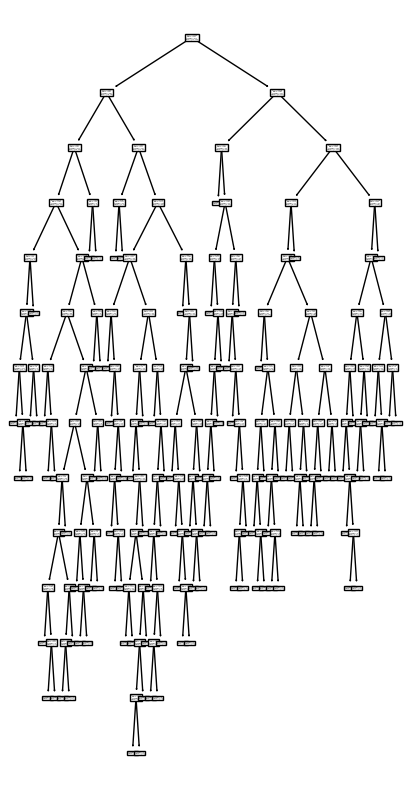

In [10]:
plt.figure(figsize=(5,10))
tree.plot_tree(clf)
plt.show()